In [112]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [152]:
df = pd.read_csv('heart.csv')
df.head(10)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [147]:
print("Citation\n")
citation = "David Chicco, Guiseppe Jurman: 'Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone.'\nBMC Medical Informatics and Decision Making 20, 16 (2020)\n<https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5>\n<https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data>. 6 October 2023"
print(citation)

Citation

David Chicco, Guiseppe Jurman: 'Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone.'
BMC Medical Informatics and Decision Making 20, 16 (2020)
<https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5>
<https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data>. 6 October 2023


In [79]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [77]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


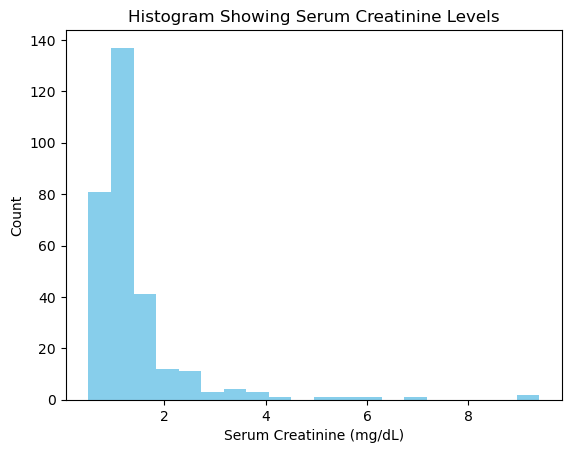

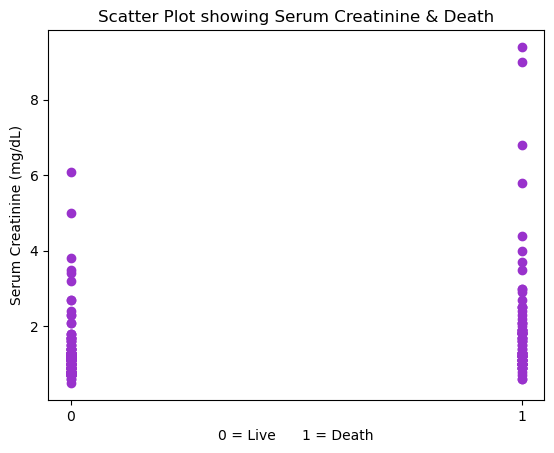

In [144]:
plt.hist(df["serum_creatinine"], bins=20, color="skyblue")
plt.title("Histogram Showing Serum Creatinine Levels")
plt.xlabel("Serum Creatinine (mg/dL)")
plt.ylabel("Count")
plt.show()
plt.scatter(df["DEATH_EVENT"], df["serum_creatinine"], color="darkorchid")
plt.title("Scatter Plot showing Serum Creatinine & Death")
plt.xlabel("0 = Live      1 = Death")
plt.ylabel("Serum Creatinine (mg/dL)")
plt.xticks(np.arange(0,1.1, step=1))
plt.show()

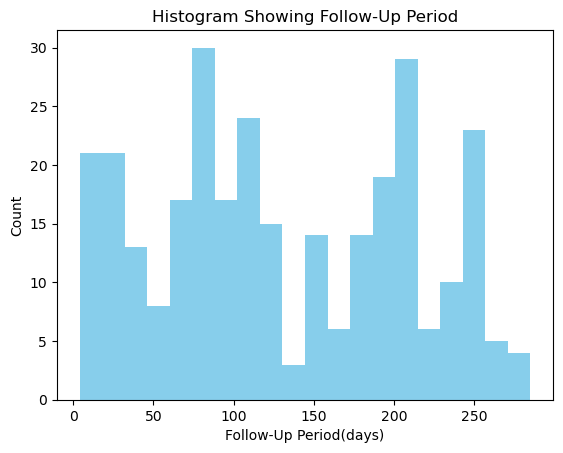

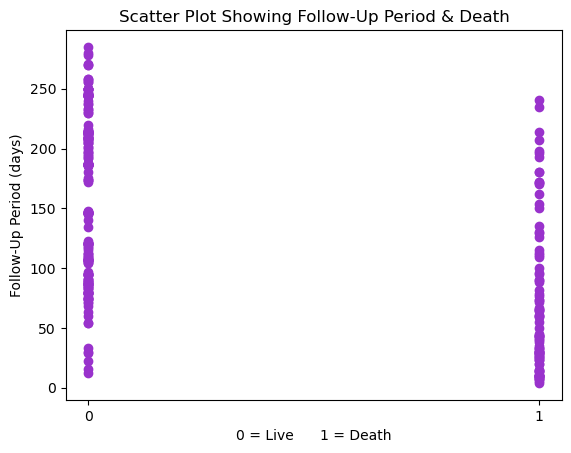

In [145]:
plt.hist(df["time"], bins=20, color = "skyblue")
plt.title("Histogram Showing Follow-Up Period")
plt.xlabel("Follow-Up Period(days)")
plt.ylabel("Count")
plt.show()
plt.scatter(df["DEATH_EVENT"], df["time"], color = "darkorchid")
plt.title("Scatter Plot Showing Follow-Up Period & Death")
plt.xlabel("0 = Live      1 = Death")
plt.ylabel("Follow-Up Period (days)")
plt.xticks(np.arange(0,1.1, step=1))
plt.show()

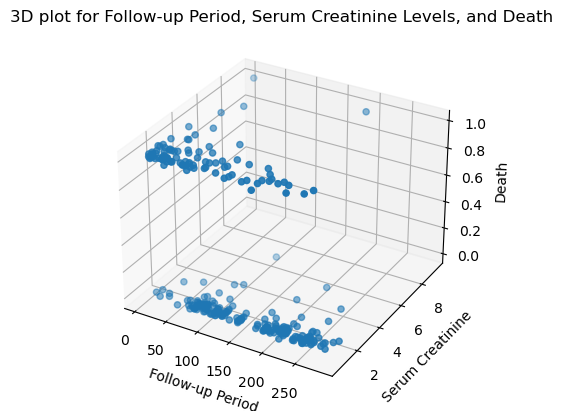

In [89]:
fig = plt.axes(projection="3d")

x_data = df['time']
y_data = df['serum_creatinine']
z_data = df['DEATH_EVENT']

fig.scatter(x_data, y_data, z_data)
fig.set_title("3D plot for Follow-up Period, Serum Creatinine Levels, and Death")
fig.set_xlabel("Follow-up Period")
fig.set_ylabel("Serum Creatinine(mg/dL)")
fig.set_zlabel("Death (0 = Alive, 1 = Dead)")
plt.show()


In [150]:
print("Training and Testing Model")
print("\n")
#uses features of sk_learn

X = df[['time', 'serum_creatinine']] # sets up predictor variables
Y = df[['DEATH_EVENT']] # sets up outcome variable

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.50,random_state=100) #Splits Dataset into training set and testing set, sets up over 150 predictions

logreg= LogisticRegression()
logreg.fit(X_train,y_train) # Sets up logistic regression

y_pred=logreg.predict(X_test)
print (X_test) # simulates test values for time and serum_creatinine
print("\n")
print("Prediction: 0 = No Death, 1 = Death")
print("\n")
print (y_pred) # predicts death given values from X_test



Training and Testing Model


     time  serum_creatinine
221   200              1.10
139   108              0.80
235   209              1.10
175   146              1.00
230   207              1.70
..    ...               ...
275   245              0.80
28     26              5.80
24     23              1.83
216   196              0.90
115    91              1.00

[150 rows x 2 columns]


Prediction: 0 = No Death, 1 = Death


[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 0]


In [151]:
 # again using sk_learn

print("Model's Performance")
print("\n")

print('Accuracy Score: ',metrics.accuracy_score(y_test, y_pred)) # 
print("Precision Score:",metrics.precision_score(y_test, y_pred, zero_division=1))
print('Recall Score: ',metrics.recall_score(y_test, y_pred, zero_division=1))

print("\n")
print("Conclusion: Accuracy, Precision, and Recall scores are decent.")

Model's Performance


Accuracy Score:  0.86
Precision Score: 0.8717948717948718
Recall Score:  0.68


Conclusion: Accuracy, Precision, and Recall scores are decent.
